In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from gendis.genetic import GeneticExtractor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tools.data_extraction import DataExtractor
from tools.trajectory_generator import TrajectoryGenerator
from tools.utils import standardize_data, print_genetic_param, print_settings, set_movements
from tools.experiments import Experiments


np.random.seed(1337)  # Random seed for reproducibility

tr_gen_options = {"samples": 25,
                  "freq": 3,
                  "reset_data": True}
dt_gen_options = {"n_test": 30}

train_test_options = {"split": 25}

df_csv_options = {"ts_class": "Bearing"}

gen_options = {"population_size": 20,
               "iterations": 15,
               "verbose": True,
               "normed": True,
               "add_noise_prob": 0.0,
               "add_shapelet_prob": 0.3,
               "wait": 10,
               "plot": True,
               "remove_shapelet_prob": 0.3,
               "crossover_prob": 0.66,
               "n_jobs": 4}

settings = {"trajectory_generator_options": tr_gen_options,
            "data_generation_options": dt_gen_options,
            "train_test_options":train_test_options,
            "define_csvs_option": df_csv_options,
            "genetic_options": gen_options}

tr_gen_options = settings["trajectory_generator_options"]
dt_gen_options = settings["data_generation_options"]
df_csvs_options = settings["define_csvs_option"]
train_test_options = settings["train_test_options"]
genetic_options = settings["genetic_options"]

movements = ['step_up_right',
             'random'
             ]
set_movements(movements)


/home/kotsos/anaconda3/envs/generator_trajectories/lib/python3.6/site-packages/deap/tools/_hypervolume/pyhv.py:33: ImportWarning: Falling back to the python version of hypervolume module. Expect this to be very slow.
  "module. Expect this to be very slow.", ImportWarning)
/home/kotsos/anaconda3/envs/generator_trajectories/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/home/kotsos/anaconda3/envs/generator_trajectories/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [15]:
# Create files if not created
tr_gen = TrajectoryGenerator(**tr_gen_options)
tr_gen.data_generation(**dt_gen_options)
# Read in the datafiles
dex = DataExtractor()
train_df, test_df = dex.train_test_dataframes(**train_test_options)
print("The train samples length is:{0}".format(len(train_df[0] * train_test_options["split"]*2)))
print("The test samples length is:{0}\n".format(len(test_df[0] * train_test_options["split"]*2)))
dex.define_csv(**df_csvs_options)

x_train, y_train, x_test, y_test = dex.load_datasets()


Starting the generator with attributes: 
Original latitude: 37.295493
Original longitude: 23.824322
Initial bearing: 90
Initial speed: 5
Number of samples: 25
Starting time of measurements: 2015-02-01 12:00:00
With initial frequency of collected data: 3 min
and hard reset of data: True

Create directory 'data' 
now creating data for movement: step_up_right
now creating data for movement: random
Done with generator

Reading the data files....Done reading files
The train samples length is:1200
The test samples length is:300

Creating x_train.csv--y_train.csv and x_test.csv--y_test.csv ...Done with train.csv ...Done with test.csv
Loading the csv files to the appropriate train and test arrays(nparrays)...Done


In [47]:
from math import radians
result = map(lambda i:radians(i),x_train[0])


In [48]:
print(list(result))

[1.0995574287564276, 2.530727415391778, 2.530727415391778, 2.530727415391778, 0.8552113334772214, 0.8552113334772214, 2.5656340004316642, 2.5656340004316642, 2.5656340004316642, 2.5656340004316642, 2.5656340004316642, 0.9599310885968813, 0.9599310885968813, 0.9599310885968813, 0.9599310885968813, 0.9599310885968813, 2.4085543677521746, 2.4085543677521746, 0.8377580409572782, 0.8377580409572782, 0.8377580409572782, 0.8377580409572782, 2.548180707911721, 2.548180707911721, 2.548180707911721]


In [ ]:
x_train=np.diff(x_train)
x_test=np.diff(x_test)

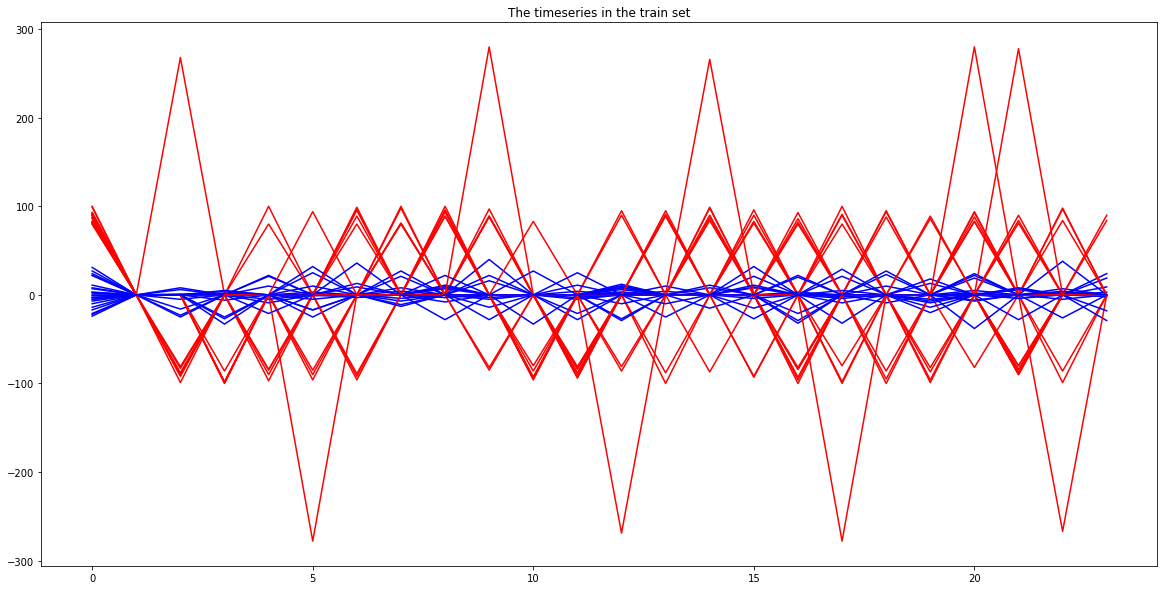

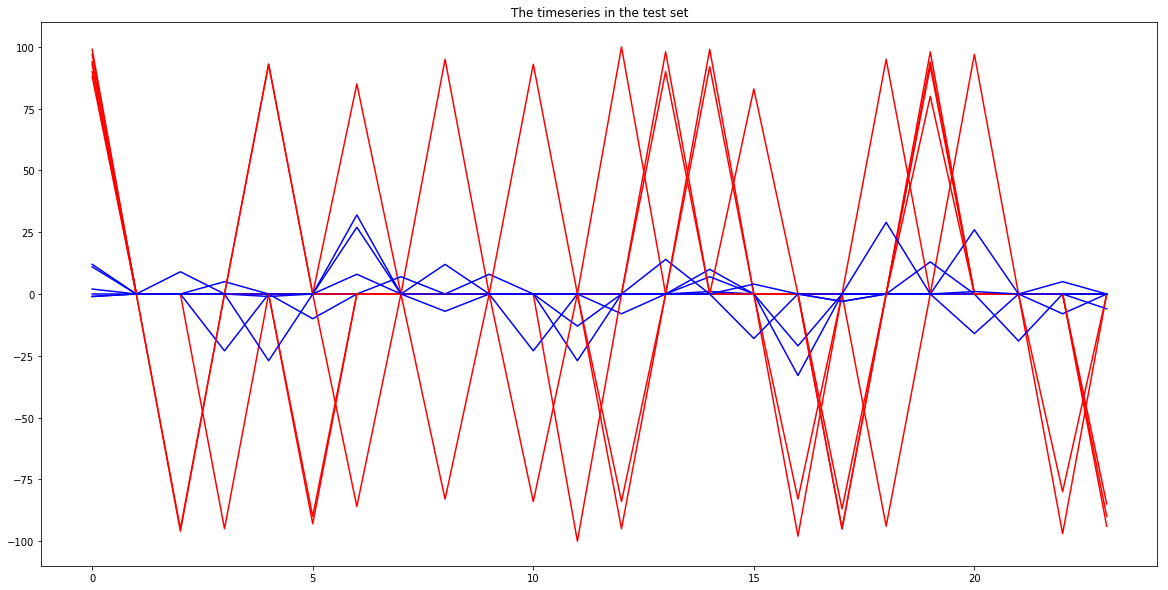

In [4]:
# Visualize the timeseries in the train and test set
colors = ['r', 'b', 'g', 'y', 'c']
plt.figure(figsize=(20, 10))
for ts, label in zip(x_train, y_train):
    plt.plot(range(len(ts)), ts, c=colors[int(label%len(colors))])
plt.title('The timeseries in the train set')
plt.show()

plt.figure(figsize=(20, 10))
for ts, label in zip(x_test, y_test):
    plt.plot(range(len(ts)), ts, c=colors[int(label%len(colors))])
plt.title('The timeseries in the test set')
plt.show()

standardized train and test data

Starting fit in genetic extractor with:
population size:20
iterations: 15
normed: True
noise_prob: 0.0
add_shapelet_prob: 0.3
remove_shapelet_prob: 0.3
crossover_prob: 0.66



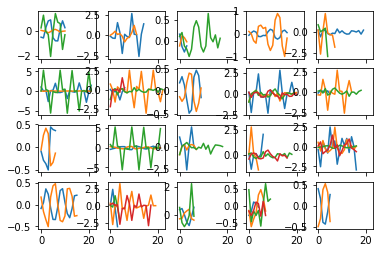

it		avg		std		max		time
1		-0.4368		0.211		-0.118841	9.5116
2		-0.3381		0.183		-0.114116	7.6542
3		-0.3451		0.115		-0.114116	9.3874
4		-0.2941		0.083		-0.114116	9.6976
5		-0.311		0.072		-0.114116	7.1402
6		-0.2911		0.122		-0.113507	9.3485
7		-0.2436		0.11		-0.113507	8.3313
8		-0.2321		0.081		-0.090815	9.6575
9		-0.1848		0.065		-0.090815	11.4232
10		-0.1315		0.047		-0.076723	8.4435
11		-0.0978		0.048		-0.046759	10.0637
12		-0.0781		0.051		-0.043308	13.4529
13		-0.0636		0.038		-0.043308	13.5847
14		-0.0474		0.004		-0.043228	16.4367
15		-0.0444		0.002		-0.042946	14.3413


In [5]:
print("standardized train and test data\n")
x_train, x_test = standardize_data(x_train, x_test)
genetic_extractor = GeneticExtractor(**genetic_options)
print_genetic_param(genetic_extractor)
genetic_extractor.fit(x_train, y_train)

In [6]:
distances_train = genetic_extractor.transform(x_train)
distances_test = genetic_extractor.transform(x_test)
lr = LogisticRegression()
lr.fit(distances_train, y_train)

# Print the accuracy score on the test set
accuracy_result = accuracy_score(y_test, lr.predict(distances_test))
print('Accuracy = {}'.format(accuracy_result))

Accuracy = 0.6666666666666666
